## House Prices : Advanced Regression Techniques

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#define parent data path
data_parent_path='data'

In [7]:
#read train and test data
train_data=pd.read_csv(os.path.join(data_parent_path,'train.csv'))
test_data=pd.read_csv(os.path.join(data_parent_path,'test.csv'))

In [8]:
#print first 5 rows of train data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
#print first 5 rows of test data
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
#print shape of train and test data
print("Train data has {} rows and {} columns".format(train_data.shape[0],train_data.shape[1]))
print("Test data has {} rows and {} columns".format(test_data.shape[0],test_data.shape[1]))

Train data has 1460 rows and 81 columns
Test data has 1459 rows and 80 columns


In [15]:
#print column names of train and test data
print(train_data.columns)
print("--------------------------------------------------------------------------")
print(test_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
#print dtypes of all columns of train data
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [24]:
#print names and length of categorical columns in train data
print(train_data.select_dtypes(include='object').columns)
print( )
non_numeric_cols = len(train_data.select_dtypes(include='object').columns)
print("Total Columns with Non-numeric data = {}".format(non_numeric_cols))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Total Columns with Non-numeric data = 43


In [25]:
#print names and length of numerical columns in train data
print(train_data.select_dtypes(include=['int','float']).columns)
print( )
numeric_cols = len(train_data.select_dtypes(include=['int','float']).columns)
print("Total Columns with numeric data = {}".format(numeric_cols))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Total Columns with numeric data = 38


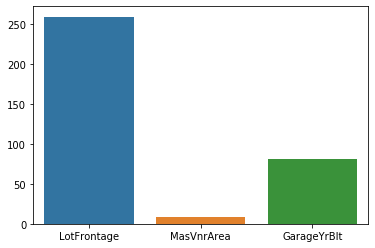

In [29]:
#plot total number of null values in numerical columns in train data
missing_values_info=train_data.select_dtypes(include=['int','float']).isna().sum()
missing_values_info=missing_values_info[missing_values_info>0]
sns.barplot(missing_values_info.index.values,missing_values_info)

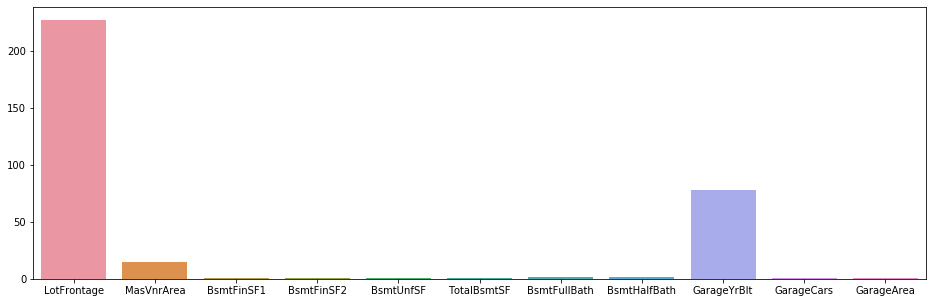

In [30]:
#plot total number of null values in numerical columns in test data
missing_values_info=test_data.select_dtypes(include=['int','float']).isna().sum()
missing_values_info=missing_values_info[missing_values_info>0]
plt.figure(figsize=(16,5))
sns.barplot(missing_values_info.index.values,missing_values_info)

In [31]:
#impute lot frontage with mean strategy in train data
print("Missing vaues in lot frontage before imputation:",train_data['LotFrontage'].isna().sum())
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
print("Missing vaues in lot frontage after imputation:",train_data['LotFrontage'].isna().sum())

Missing vaues in lot frontage before imputation: 259
Missing vaues in lot frontage after imputation: 0


In [32]:
#impute lot frontage with mean strategy in test data
print("Missing vaues in lot frontage before imputation:",test_data['LotFrontage'].isna().sum())
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
print("Missing vaues in lot frontage after imputation:",test_data['LotFrontage'].isna().sum())

Missing vaues in lot frontage before imputation: 227
Missing vaues in lot frontage after imputation: 0


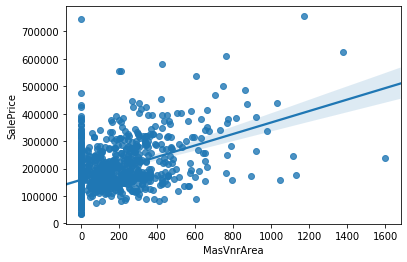

In [33]:
#plot reg plot between target variable and MasVnrArea
sns.regplot(x=train_data['MasVnrArea'],y=train_data['SalePrice'])
#since SalePrice and MasVnrArea have strong positive correlation we will not drop it

In [35]:
#fill null values in MasVnrArea with 0.0 in train data
print("Missing vaues in MasVnrArea before imputation:",train_data['MasVnrArea'].isna().sum())
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
print("Missing vaues in MasVnrArea after imputation:",train_data['MasVnrArea'].isna().sum())

Missing vaues in MasVnrArea before imputation: 0
Missing vaues in MasVnrArea after imputation: 0


In [36]:
#fill null values in MasVnrArea with 0.0 in test data
print("Missing vaues in MasVnrArea before imputation:",test_data['MasVnrArea'].isna().sum())
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
print("Missing vaues in MasVnrArea after imputation:",test_data['MasVnrArea'].isna().sum())

Missing vaues in MasVnrArea before imputation: 15
Missing vaues in MasVnrArea after imputation: 0


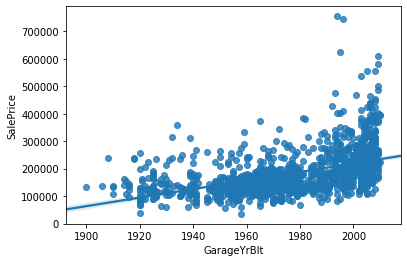

In [37]:
#plot reg plot between target variable and GarageYrBtl
sns.regplot(x=train_data['GarageYrBlt'],y=train_data['SalePrice'])
#since GaragreYrBlt and SalePrice have strong positive correlation we will not drop it

In [38]:
def replace_year(garageyear,houseyear):
    if garageyear< houseyear:
        return houseyear
    else:
        return garageyear

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


1980.0


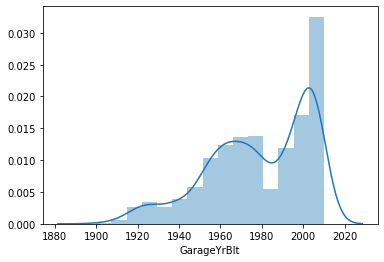

In [39]:
sns.distplot(train_data.GarageYrBlt[train_data['GarageYrBlt'].values>0],hist=True)
print(train_data['GarageYrBlt'].median())

In [40]:
#fill null values in GarageYrBlt with median acc to neighborhood in train data
print("Missing vaues in GarageYrBlt before imputation:",train_data['GarageYrBlt'].isna().sum())
train_data.GarageYrBlt.fillna(train_data.groupby(['Neighborhood']).transform('median').GarageYrBlt, inplace=True)
#check if Garage is built before House , replace it with year in which house is built
train_data['GarageYrBlt']=train_data.apply(lambda x:replace_year(x.GarageYrBlt,x.YearBuilt),axis=1)
print("Missing vaues in GarageYrBlt after imputation:",train_data['GarageYrBlt'].isna().sum())

Missing vaues in GarageYrBlt before imputation: 81


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Missing vaues in GarageYrBlt after imputation: 0


In [41]:
#fill null values in GarageYrBlt with median acc to neighborhood in test data
print("Missing vaues in GarageYrBlt before imputation:",test_data['GarageYrBlt'].isna().sum())
test_data.GarageYrBlt.fillna(test_data.groupby(['Neighborhood']).transform('median').GarageYrBlt, inplace=True)
#check if Garage is built before House , replace it with year in which house is built
test_data['GarageYrBlt']=test_data.apply(lambda x:replace_year(x.GarageYrBlt,x.YearBuilt),axis=1)
print("Missing vaues in GarageYrBlt after imputation:",test_data['GarageYrBlt'].isna().sum())

Missing vaues in GarageYrBlt before imputation: 78
Missing vaues in GarageYrBlt after imputation: 0


In [42]:
#fill null values in BsmtFinSF1 with mode i.e 0.0 in test data
print("Missing vaues in BsmtFinSF1 before imputation:",test_data['BsmtFinSF1'].isna().sum())
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mode()[0])
print("Missing vaues in BsmtFinSF1 after imputation:",test_data['BsmtFinSF1'].isna().sum())

Missing vaues in BsmtFinSF1 before imputation: 1
Missing vaues in BsmtFinSF1 after imputation: 0


In [43]:
#fill null values in BsmtFinSF2 with mode i.e 0.0 in test data
print("Missing vaues in BsmtFinSF2 before imputation:",test_data['BsmtFinSF2'].isna().sum())
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mode()[0])
print("Missing vaues in BsmtFinSF2 after imputation:",test_data['BsmtFinSF2'].isna().sum())

Missing vaues in BsmtFinSF2 before imputation: 1
Missing vaues in BsmtFinSF2 after imputation: 0


In [44]:
#fill null values in BsmtUnfSF with mean in test data
print("Missing vaues in BsmtUnfSF before imputation:",test_data['BsmtUnfSF'].isna().sum())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
print("Missing vaues in BsmtUnfSF after imputation:",test_data['BsmtUnfSF'].isna().sum())

Missing vaues in BsmtUnfSF before imputation: 1
Missing vaues in BsmtUnfSF after imputation: 0


In [45]:
#fill null values in TotalBsmtSF with mean in test data
print("Missing vaues in TotalBsmtSF before imputation:",test_data['TotalBsmtSF'].isna().sum())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
print("Missing vaues in TotalBsmtSF after imputation:",test_data['TotalBsmtSF'].isna().sum())

Missing vaues in TotalBsmtSF before imputation: 1
Missing vaues in TotalBsmtSF after imputation: 0


In [46]:
#fill null values in BsmtFullBath with mode i.e. 0.0 in test data
print("Missing vaues in BsmtFullBath before imputation:",test_data['BsmtFullBath'].isna().sum())
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
print("Missing vaues in BsmtFullBath after imputation:",test_data['BsmtFullBath'].isna().sum())

Missing vaues in BsmtFullBath before imputation: 2
Missing vaues in BsmtFullBath after imputation: 0


In [47]:
#fill null values in BsmtHalfBath with mode i.e. 0.0 in test data
print("Missing vaues in BsmtHalfBath before imputation:",test_data['BsmtHalfBath'].isna().sum())
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
print("Missing vaues in BsmtHalfBath after imputation:",test_data['BsmtHalfBath'].isna().sum())

Missing vaues in BsmtHalfBath before imputation: 2
Missing vaues in BsmtHalfBath after imputation: 0


In [48]:
#fill null values in GarageCars i.e. 2.0 in test data
print("Missing vaues in GarageCars before imputation:",test_data['GarageCars'].isna().sum())
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mode()[0])
print("Missing vaues in GarageCars after imputation:",test_data['GarageCars'].isna().sum())

Missing vaues in GarageCars before imputation: 1
Missing vaues in GarageCars after imputation: 0


In [49]:
#fill null values in GarageArea with mean in test data
print("Missing vaues in GarageArea before imputation:",test_data['GarageArea'].isna().sum())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
print("Missing vaues in GarageArea after imputation:",test_data['GarageArea'].isna().sum())

Missing vaues in GarageArea before imputation: 1
Missing vaues in GarageArea after imputation: 0


In [50]:
#check null values in train and test data in numerical columns
print(train_data.select_dtypes(include=['int','float']).isna().sum())
print("==============")
print(test_data.select_dtypes(include=['int','float']).isna().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0

16


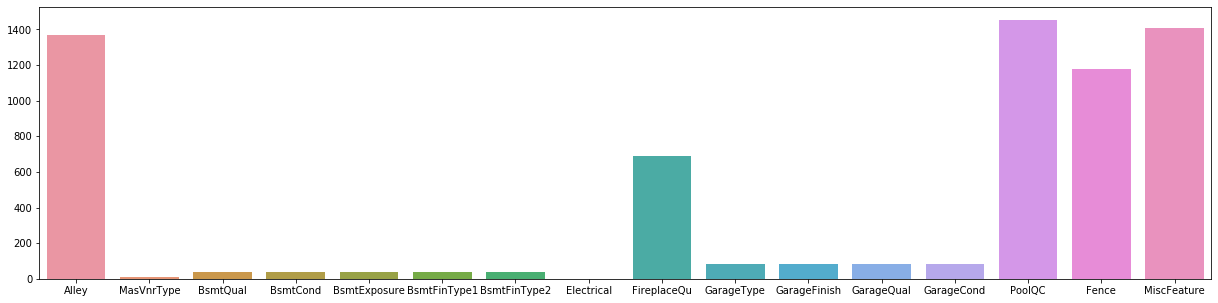

In [51]:
#plot total number of null values in categorical columns in train data
missing_values_info=train_data.select_dtypes(include=['object']).isna().sum()
missing_values_info=missing_values_info[missing_values_info>0]
print(len(missing_values_info))
plt.figure(figsize=(21,5))
sns.barplot(missing_values_info.index.values,missing_values_info)

22


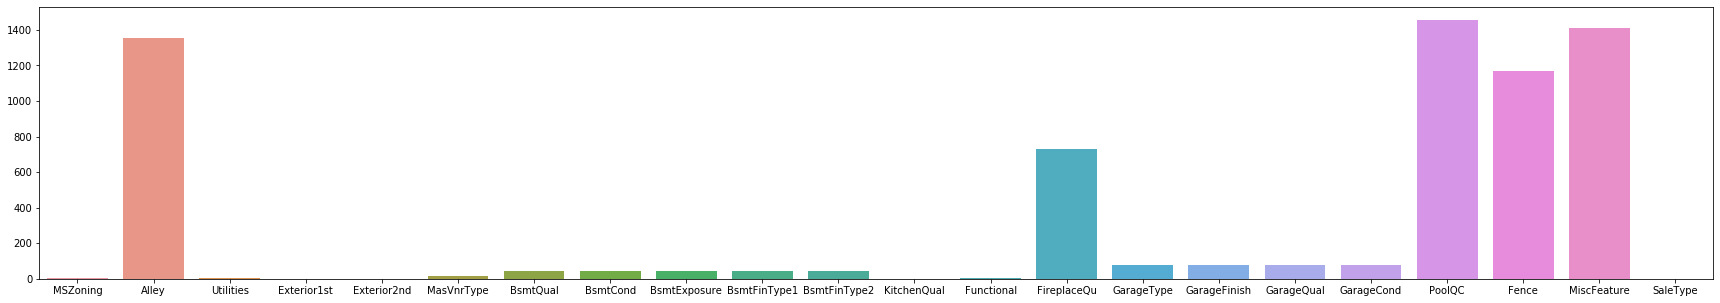

In [52]:
#plot total number of null values in categorical columns in test data
missing_values_info=test_data.select_dtypes(include=['object']).isna().sum()
missing_values_info=missing_values_info[missing_values_info>0]
print(len(missing_values_info))
plt.figure(figsize=(30,5))
sns.barplot(missing_values_info.index.values,missing_values_info)

In [53]:
#Alley,PoolQC,Fence and MiscFeature have more than 90% null values so we will drop these columns
train_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
print('Train data shape',train_data.shape)
print('Test data shape',test_data.shape)

Train data shape (1460, 77)
Test data shape (1459, 76)


In [54]:
#analyse column MasVnrType in train data
print("Null values count",train_data['MasVnrType'].isna().sum())
print("Unique values count",train_data['MasVnrType'].value_counts())

Null values count 8
Unique values count None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [55]:
#fill MasVnrType with Mode i.e: None
print("Missing vaues in MasVnrType before imputation:",train_data['MasVnrType'].isna().sum())
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
print("Missing vaues in MasVnrType after imputation:",train_data['MasVnrType'].isna().sum())

Missing vaues in MasVnrType before imputation: 8
Missing vaues in MasVnrType after imputation: 0


In [41]:
print("Missing vaues in MasVnrType before imputation:",test_data['MasVnrType'].isna().sum())
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
print("Missing vaues in MasVnrType after imputation:",test_data['MasVnrType'].isna().sum())

Missing vaues in MasVnrType before imputation: 16
Missing vaues in MasVnrType after imputation: 0


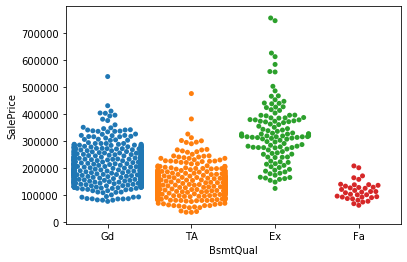

In [44]:
sns.swarmplot(train_data['BsmtQual'],train_data['SalePrice'])

In [52]:
#analyse column BsmtQual in train data
print("Null values count",train_data['BsmtQual'].isna().sum())
print("Unique values count",train_data['BsmtQual'].value_counts())

Null values count 37
Unique values count TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [53]:
print("Missing vaues in BsmtQual before imputation:",train_data['BsmtQual'].isna().sum())
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
print("Missing vaues in BsmtQual after imputation:",train_data['BsmtQual'].isna().sum())

Missing vaues in BsmtQual before imputation: 37
Missing vaues in BsmtQual after imputation: 0


In [54]:
print("Missing vaues in BsmtQual before imputation:",test_data['BsmtQual'].isna().sum())
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
print("Missing vaues in BsmtQual after imputation:",test_data['BsmtQual'].isna().sum())

Missing vaues in BsmtQual before imputation: 44
Missing vaues in BsmtQual after imputation: 0
